
# Renuka Khopale

### 1. Problem Statement :Titanic Classification

Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

### Loading Important Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot as plt
import seaborn as sns

### Data Preparation and EDA

So before modeling we need to prepare the data.

In [3]:
train=pd.read_csv("train.csv")
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test=pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train=train.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis=1)
test=test.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
train['Along']= train['SibSp'] + train['Parch']

In [10]:
train['Along'].loc[train['Along']>0] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_36036\3514869061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Along'].loc[train['Along']>0] = 1


In [11]:
train.drop(['SibSp','Parch'],inplace=True,axis=1)

### Checking For Null Value

In [12]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Along         0
dtype: int64

### Handling Null Values

Now we have NAN values in Age so we need to properly handle that so we need 
to observe on what factors age depend or vary

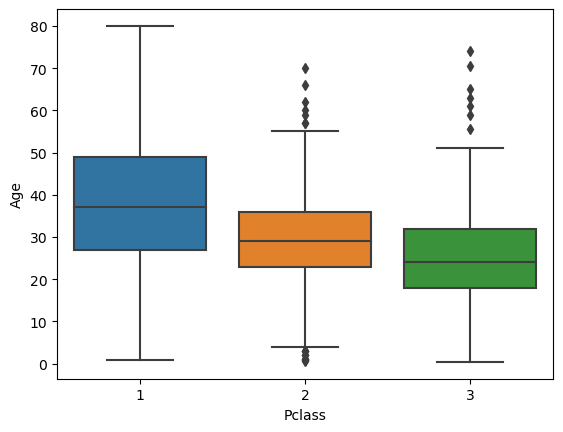

In [13]:
sns.boxplot(x='Pclass', y='Age', data = train)
plt.show()

For each Pclass Age of Passengers vary

In [14]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


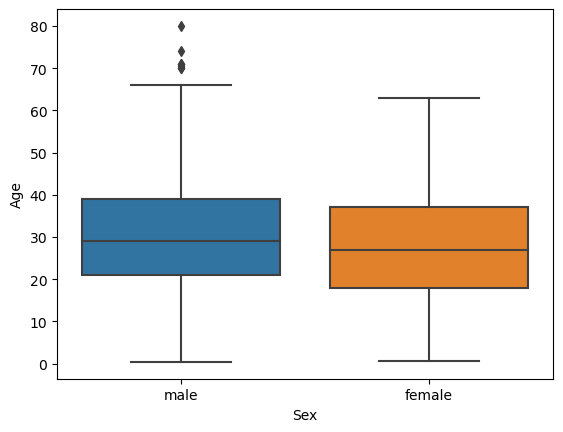

In [61]:
sns.boxplot(x='Sex', y='Age', data = train)
plt.show()

In [15]:
print(train[train['Sex']==1]['Age'].mean())
print(train[train['Sex']==0]['Age'].mean())

nan
nan


These are the only categorical column from which we can guess the age data so lets create a function to fill age

In [17]:
def fill_age(row):
    age = row[0]
    pclass = row[1]
    sex=row[2]
    if pd.isnull(age):
        if pclass==1 and sex==1:
            return ((38.23+30.72)/2)
        elif pclass==1 and sex==0:
            return ((38.23+27.92)/2)
        elif pclass == 2 and sex==1:
            return ((29.87+30.72)/2)
        elif pclass == 2 and sex==0:
            return ((29.87+27.92)/2)
        elif pclass == 3 and sex==1:
            return ((25.14+30.72)/2)
        else:
            return ((25.14+27.72)/2)
        
    else:
        return age    
            

In [18]:
train['Age'] =  train[['Age', 'Pclass','Sex']].apply(fill_age, axis=1)

In [19]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Along       0
dtype: int64

#### Categorical Value

There is only one category value 'defect' so we need to convert it into numbers

In [20]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Along
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


In [21]:
train['Sex'] =  train['Sex'].replace(['male', 'female'], [1, 0])

In [22]:
train.head()


,Survived,Pclass,Sex,Age,Fare,Along
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0


#### Splitting Into Inputs and Labels

In [23]:
Y=train['Survived']
X=train.drop('Survived',axis=1)

In [24]:
X.shape

(891, 5)

In [25]:
Y.shape

(891,)

### Feature Engineering

As we can see our data is consist of many columns so we need to check whether each column is related and importand for making prediction or not we we will see the importance of each columns

In [26]:
bestfeatures=SelectKBest( k='all')

In [28]:
fit=bestfeatures.fit(X,Y)
fit.scores_

array([115.03127219, 372.4057236 ,   3.23905711,  63.03076423,
        38.3536514 ])

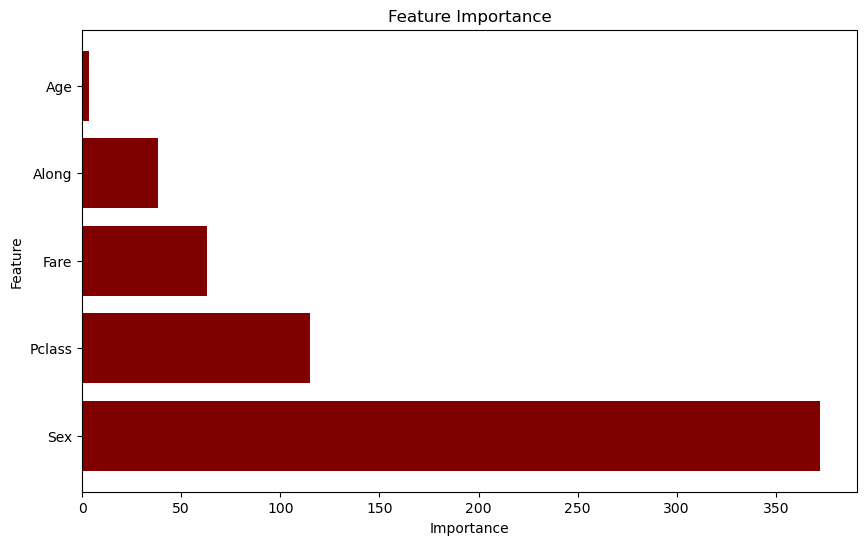

In [29]:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': fit.scores_})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importances_df['Feature'], importances_df['Importance'] , color = 'Maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

As we can see each column holds a significant number of value so we do not drop any column

### Model 1 Logistic Regression

we will start with the most simple model Logistic Regression and see how well it performs

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
X.head()

,Pclass,Sex,Age,Fare,Along
0,3,1,22.0,7.2500,1
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,0
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [32]:
model1=LogisticRegression(max_iter=100)
model1.fit(X,Y)

LogisticRegression()

In [33]:
model1.score(X,Y)

0.7867564534231201

### Preparing Test Data

In [34]:
X_test=pd.read_csv("test.csv")

In [35]:
X_test =X_test.drop(columns= [ 'PassengerId', 'Name', 'Ticket', 'Cabin','Embarked' ])

In [36]:
X_test['Along']= X_test['SibSp'] + X_test['Parch']

In [37]:
X_test['Along'].loc[X_test['Along']>0] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_36036\3729373848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Along'].loc[X_test['Along']>0] = 1


In [38]:
X_test.drop(['SibSp','Parch'],inplace=True,axis=1)

In [39]:
X_test['Sex'] =  X_test['Sex'].replace(['male', 'female'],[1, 0])

In [40]:
X_test['Age'] =  X_test[['Age', 'Pclass','Sex']].apply(fill_age, axis=1)

In [41]:
X_test['Fare'] =  X_test['Fare'].fillna(X_test['Fare'].mean())

In [42]:
X_test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
Along     0
dtype: int64

### Making Submission

As we see model1 give 79% accuracy on train data so now we fill make Submission File

In [43]:
sample_file=pd.read_csv('gender_submission.csv')
sample_file.shape

(418, 2)

In [44]:
predictions = model1.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
len(predictions)

418

In [46]:
sample_file['Survived'] = predictions

In [47]:
sample_file.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [48]:
sample_file.to_csv("submissionLR.csv",index=False)

### Model 2 Decision Tree

Now we will try Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
model2.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
model2.score(X,Y)

0.8271604938271605

In [53]:
sample_file=pd.read_csv('gender_submission.csv')
sample_file.shape

(418, 2)

In [54]:
predictions = model2.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
sample_file['Survived'] = predictions

In [56]:
sample_file.to_csv("submissionDT.csv",index=False)

### Model 3 Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X, Y)
print(model3.score(X,Y))

0.9820426487093153


In [59]:
sample_file=pd.read_csv('gender_submission.csv')
sample_file.shape

(418, 2)

In [60]:
predictions = model3.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
sample_file['Survived'] = predictions

In [62]:
sample_file.to_csv("submissionRFC.csv",index=False)

### Model 4 LightGBM

In [63]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier()
model4.fit(X, Y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [65]:
model4.score(X,Y)

0.936026936026936

In [66]:
sample_file=pd.read_csv('gender_submission.csv')
sample_file.shape

(418, 2)

In [113]:
predictions = model4.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
sample_file['Survived'] = predictions

In [68]:
sample_file.to_csv("submissionLGB.csv",index=False)

### Model 5 Ensemble Learning

In Ensemple Learning we will combine different models or different models results in order to produced a prediction favoured by most of the models. The key behind Ensemble Learning is if a prediction is favoured by most of the model then there is a higher chance of that prediction to be True. So now we will combine all the models we previously Trained to produce a prediction file which contained the predictions favoured by most of the models

In [70]:
import pandas as pd
from collections import Counter

file_names = ['submissionLR.csv', 'submissionDT.csv', 'submissionRFC.csv', 'submissionLGB.csv']

id_outcomes = {}

for file_name in file_names:
    df = pd.read_csv(file_name)
    for index, row in df.iterrows():
        id_value = row['PassengerId']
        outcome = row['Survived']
        if id_value in id_outcomes:
            id_outcomes[id_value].append(outcome)
        else:
             id_outcomes[id_value] = [outcome]

most_common_outcomes = {}
for id_value, outcomes in id_outcomes.items():
    outcome_counts = Counter(outcomes)
    most_common_outcome = outcome_counts.most_common(1)[0][0]
    most_common_outcomes[id_value] = most_common_outcome

result_df = pd.DataFrame(list(most_common_outcomes.items()), columns=['PassengerId', 'Survived'])

result_df.to_csv('submissionEnsemble.csv', index=False)